In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linspace
from subprocess import call
import sys
sys.path.append('../')
from package_global_functions import *

model = 'Galla'

pis = [0.3, 0.3]
#pis = [0.4, 0.2]
qs = [7, 10]
arena_r = 20
exclusion_r = 1.5
# puc fer servir tots els ir, quan no estigui simulat el df quedarà buit pero el programa no peta
# interac_r = [20,13,12,11,10,9,8,7,6,5,4,3,2] # er 0, pi 30 30
#interac_r = [20,13,12,11,10,9,8,7,6,5,4,3.9,3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.1,3,2]
# interac_r = [12,10,8,7,6,5,4.8,4.5,4.2,4,3.9,3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.1,3]
#interac_r = [20,12,10,7,4,3,2]
interac_r = linspace(3,12,19)
interac_r = [3.0, 3.5, 4.0, 7.0]
N = 35

df = pd.read_csv(f'{model}/{N}_bots/sim_fp_results_er_{exclusion_r}_NOPUSH.csv') # _NOPUSH
df = df.loc[(df['arena_r'] == arena_r) & (df['pi1'] == pis[0]) & (df['pi2'] == pis[1]) & (df['q1'] == qs[0]) & (df['q2'] == qs[1])]

In [14]:
# mean field values:
def get_mf_values(pis, qs, lambs):
    fs = [[],[],[]]
    for l in lambs:
        call(f'python ../det_sols_from_polynomial/f0poly_sols_clean.py {pis[0]} {pis[1]} {qs[0]} {qs[1]} {l} > sols.dat', shell=True)
        with open('sols.dat', 'r') as file:
            sols = [float(f) for f in file.readline().split()]
            fs[0].append(sols[0]), fs[1].append(sols[1]), fs[2].append(sols[2])
    dfmf = pd.DataFrame({'lambda':lambs, 'f0':fs[0], 'f1':fs[1], 'f2':fs[2]})
    return dfmf

lambs = list(pd.unique(df['lambda']))
dfmf = get_mf_values(pis, qs, lambs)

In [3]:
# zero interaction values:
def zero_interaction_f(pis, qs, lamb):
    f0 = 1/(1+(1-lamb)*(pis[0]*qs[0]+pis[1]*qs[1]))
    f1 = pis[0]*qs[0]*(1-lamb)*f0
    f2 = pis[1]*qs[1]*(1-lamb)*f0
    return [f0,f1,f2]

zeroi_fs = {'lambda':[], 'f0':[], 'f1':[], 'f2':[]}
for l in dfmf['lambda']:
    zeroi_fs['lambda'].append(l)
    res = zero_interaction_f(pis, qs, l)
    zeroi_fs['f0'].append(res[0])
    zeroi_fs['f1'].append(res[1])
    zeroi_fs['f2'].append(res[2])
zeroi_fs = pd.DataFrame(zeroi_fs)

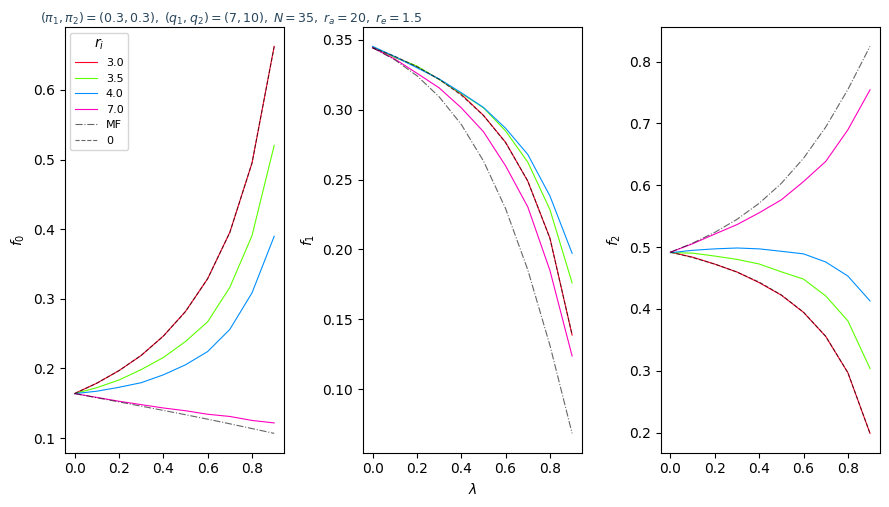

In [4]:
# Figure: (x-lambda, y-fs) for each ir
n = len(interac_r)
colors = plt.cm.gist_rainbow(linspace(0,1,n))
fig,ax = plt.subplots(1,3,figsize=(9,5))
for i,ir in enumerate(interac_r):
    dfir = df.loc[(df['interac_r'] == ir)]
    ax[0].plot(dfir['lambda'], dfir['f0'], label=f'{ir}', color=colors[i], lw=0.8)
    ax[1].plot(dfir['lambda'], dfir['f1'], color=colors[i], lw=0.8)
    ax[2].plot(dfir['lambda'], dfir['f2'], color=colors[i], lw=0.8)
ax[0].plot(dfmf['lambda'], dfmf['f0'], label=f'MF', color='k', ls='-.', alpha=0.6, lw=0.8)
ax[1].plot(dfmf['lambda'], dfmf['f1'], color='k', ls='-.', alpha=0.6, lw=0.8)
ax[2].plot(dfmf['lambda'], dfmf['f2'], color='k', ls='-.', alpha=0.6, lw=0.8)
ax[0].plot(dfmf['lambda'], zeroi_fs['f0'], label='0', color='k', ls='--', alpha=0.6, lw=0.8)
ax[1].plot(dfmf['lambda'], zeroi_fs['f1'], color='k', ls='--', alpha=0.6, lw=0.8)
ax[2].plot(dfmf['lambda'], zeroi_fs['f2'], color='k', ls='--', alpha=0.6, lw=0.8)
ax[1].set_xlabel(r'$\lambda$')
ax[0].set_ylabel(r'$f_0$')
ax[1].set_ylabel(r'$f_1$')
ax[2].set_ylabel(r'$f_2$')
ax[0].legend(title=r'$r_i$', fontsize=8)
fig.text(0.05, 0.98, rf'$(\pi_1, \pi_2) = ({pis[0]}, {pis[1]}), \; (q_1, q_2) = ({qs[0]}, {qs[1]}), \; N = {N},\; r_a = {arena_r}, \; r_e = {exclusion_r}$', fontsize=9, color='xkcd:dark grey blue')
fig.tight_layout()

### Let's se the evo with ir, fixed l

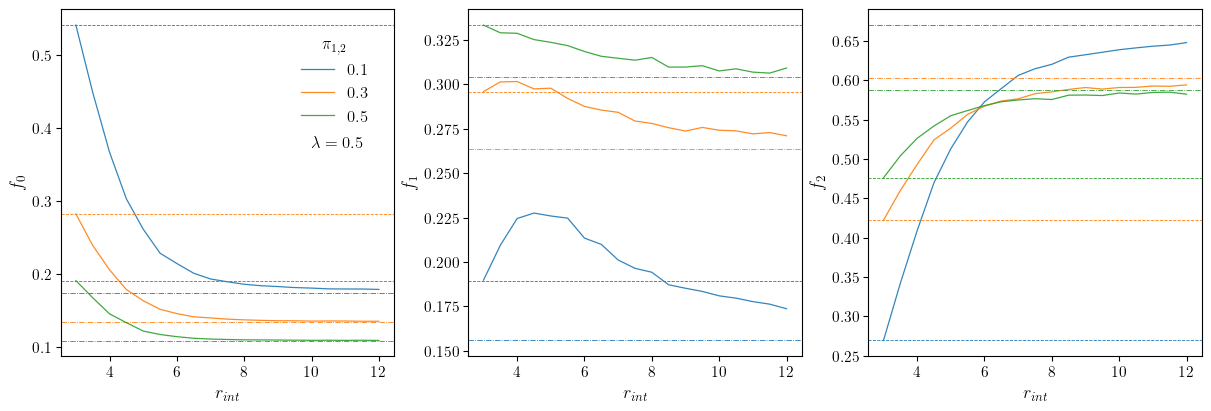

In [17]:
N = 35
# N = 492
ar = 20.0
# ar = 75.0
irs = [3.5, 4.0, 4.5, 5.0, 6.5, 7.0, 7.5]
er = 1.5
q1, q2 = 7, 10
l = 0.5

df = pd.read_csv(f'{model}/{N}_bots/sim_fp_results_er_{exclusion_r}_NOPUSH.csv') # _NOPUSH
fig, ax = plt.subplots(1,3, figsize=(12, 4), constrained_layout=True)
latexFont(size=12, titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)
# df = df.loc[(df['arena_r'] == ar) & (df['pi1'] == pi1) & (df['pi2'] == pi2) & (df['q1'] == q1) & (df['q2'] == q2) & (df['lambda'] == l)]

for pi in [0.1, 0.3, 0.5]:
    label = l if i==0 else '_nolabel_'
    pi1, pi2 = pi, pi
    dfpi = df.loc[(df['arena_r'] == ar) & (df['pi1'] == pi1) & (df['pi2'] == pi2) & (df['q1'] == q1) & (df['q2'] == q2) & (df['lambda'] == l)]
    dfmf = get_mf_values((pi, pi), (q1, q2), [l,])
    for i in range(3):
        ax[i].set(xlabel=r'$r_{int}$', ylabel=f'$f_{i}$')
        ln, = ax[i].plot(dfpi['interac_r'], dfpi[f'f{i}'], lw=0.9, alpha=0.9, label=pi)
        ax[i].axhline(zero_interaction_f((pi1, pi2), (q1,q2), l)[i], lw=0.6, ls='--', color=ln.get_color())
        ax[i].axhline(float(dfmf[f'f{i}'].iloc[0]), lw=0.6, ls='-.', color=ln.get_color())


ax[0].legend(title='$\pi_{1,2}$', frameon=False, loc=(0.7, 0.65))
ax[0].text(0.75, 0.6, f'$\lambda = {l}$', transform=ax[0].transAxes)
fig.savefig(f'test_f1increase_varpi_N_{N}_q1_{q1}_q2_{q2}_l_{l}.pdf')

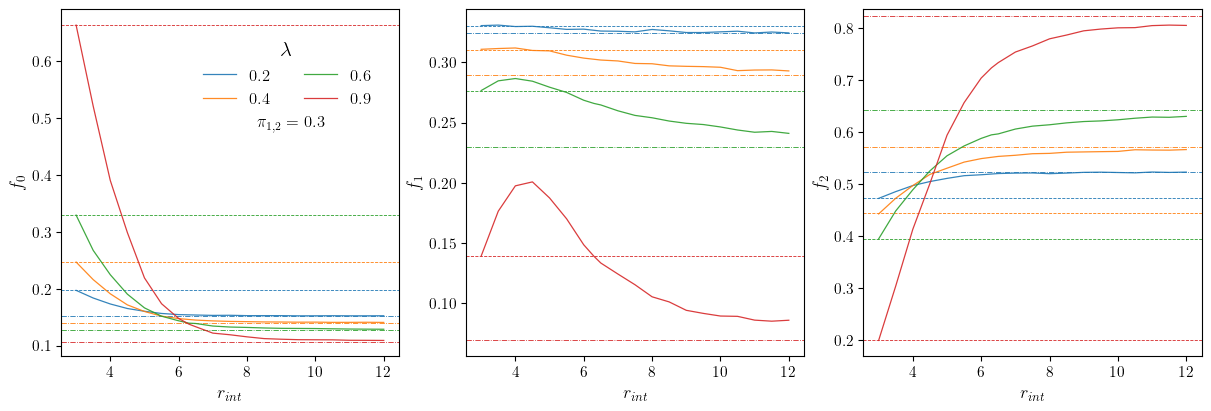

In [8]:
N = 35
# N = 492
ar = 20.0
# ar = 75.0
irs = [3.5, 4.0, 4.5, 5.0, 6.5, 7.0, 7.5]
er = 1.5
q1, q2 = 7, 10
pi1, pi2 = 0.3, 0.3
ls = [0.2, 0.4, 0.6, 0.9]
# ls = [0.6, 0.9]

df = pd.read_csv(f'{model}/{N}_bots/sim_fp_results_er_{exclusion_r}_NOPUSH.csv') # _NOPUSH
# df = df.loc[(df['arena_r'] == ar) & (df['pi1'] == pi1) & (df['pi2'] == pi2) & (df['q1'] == q1) & (df['q2'] == q2) & (df['lambda'] == l)]

fig, ax = plt.subplots(1,3, figsize=(12, 4), constrained_layout=True)
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)
for l in ls:
    dfl = df.loc[(df['arena_r'] == ar) & (df['pi1'] == pi1) & (df['pi2'] == pi2) & (df['q1'] == q1) & (df['q2'] == q2) & (df['lambda'] == l)]
    for i in range(3):
        ax[i].set(xlabel=r'$r_{int}$', ylabel=f'$f_{i}$')
        label = l if i==0 else '_nolabel_'
        ln, = ax[i].plot(dfl['interac_r'], dfl[f'f{i}'], lw=0.9, alpha=0.9, label=label)
        ax[i].axhline(zero_interaction_f((pi1, pi2), (q1, q2), l)[i], lw=0.6, ls='--', color=ln.get_color())
        ax[i].axhline(float(dfmf.loc[dfmf['lambda'] == l][f'f{i}'].iloc[0]), lw=0.6, ls='-.', color=ln.get_color())

ax[0].legend(title='$\lambda$', frameon=False, loc=(0.4, 0.7), ncol=2)
ax[0].text(0.58, 0.66, fr'$\pi_{{1,2}} = {pi1}$', transform=ax[0].transAxes, fontsize=12)
fig.savefig(f'test_f1increase_varl_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.pdf')